In [69]:
# Assignment 2
# Freddie Vasquez-Rios
# 801170633

# PART 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [71]:
# Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Random seed to randomize the dataset.
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [72]:
df_test.shape

(109, 13)

In [73]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_threeAtrain = df_train[num_vars]
df_threeAtest = df_test[num_vars]
df_threeAtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [74]:
# Two ways of rescaling:
# 1.) Min-Max Normalization
# 2.) Standardization (This code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_threeAtrain[num_vars] = scaler.fit_transform(df_threeAtrain[num_vars])
df_threeAtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149,-1.586001
496,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149,-1.090971
484,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149,-0.999299
507,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149,-1.145974
252,2.203478,0.052516,-0.573307,-0.933142,-0.819149,-0.137579


In [75]:
dataset_train = df_threeAtrain.values[:,:]
print(dataset_train[:20,:])

[[-0.71677205 -1.29437561 -0.57330726 -0.93314164 -0.81914879 -1.5860012 ]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164 -0.81914879 -1.09097091]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -0.81914879 -0.99929863]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164 -0.81914879 -1.14597428]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164 -0.81914879 -0.13757923]
 [-0.55391195  0.05251643 -0.57330726  0.21291401 -0.81914879 -0.1925826 ]
 [-0.61381451  0.05251643 -0.57330726  0.21291401  0.32555914 -0.10091032]
 [ 2.17539862  1.39940847  1.4755613   0.21291401  1.47026706  0.24744433]
 [-0.70741227 -1.29437561 -0.57330726 -0.93314164 -0.81914879 -0.63260953]
 [-0.76357092 -1.29437561  1.4755613  -0.93314164 -0.81914879 -0.59594061]
 [ 3.76656047  0.05251643 -0.57330726  0.21291401  1.47026706  2.63092353]
 [-1.14732172 -1.29437561 -0.57330726 -0.93314164 -0.81914879 -0.96262972]
 [-0.39853968  4.09319255  1.4755613   0.21291401 -0.81914879  0.68380437]
 [-0.30494192 -1.29437561

In [76]:
X_train = df_threeAtrain.values[:,0:5]
Y_train = df_threeAtrain.values[:,5]
len(X_train), len(Y_train)

(436, 436)

In [77]:
print('X =', X_train[:5])
print('Y =', Y_train[:5])

X = [[-0.71677205 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164 -0.81914879]]
Y = [-1.5860012  -1.09097091 -0.99929863 -1.14597428 -0.13757923]


In [78]:
# Convert to 2D array (381x5)
m = len(X_train)
X_1 = X_train.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[-0.71677205 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164 -0.81914879]]


In [79]:
m = len(X_train)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [80]:
X_train = np.hstack((X_0, X_1))
X_train[:5]

array([[ 1.        , -0.71677205, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.53893631, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.98820554, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.72613182, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        ,  2.20347795,  0.05251643, -0.57330726, -0.93314164,
        -0.81914879]])

In [81]:
theta = np.zeros((6,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [82]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m
lambda_value: Regularization parameter.
theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta, lambda_value):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    regularization = lambda_value * np.sum(np.square(theta))
    J = (1 / (2 * m)) * (np.sum(sqrErrors) + regularization)
    return J

In [83]:
lambda_value = 10
cost = compute_loss(X_train, Y_train, theta, lambda_value)
print("Cost loss for all given theta =", cost)

Cost loss for all given theta = 218.00000000000006


In [84]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.
lambda_value: Regularization parameter.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent(X, Y, theta, alpha, iterations, lambda_value):
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        # Use np.multiply() to multiple scalar with the array, theta.
        sum_delta = (alpha / m) * X.transpose().dot(errors) + np.multiply(theta,((lambda_value * alpha) / m));
        theta = theta - sum_delta #- regularization; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta, lambda_value)
    return theta, loss_history

In [85]:
theta = [0., 0., 0., 0., 0., 0.]
lambda_value = 10
iterations = 1500
alpha = 0.01

In [86]:
theta, loss_history = gradient_descent(X_train, Y_train, theta, alpha, iterations, lambda_value)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [2.61525137e-16 3.80662741e-01 9.19787591e-02 2.98952876e-01
 2.36076021e-01 1.59839982e-01]
loss_history = [0.49011168 0.48059349 0.47143139 ... 0.22687338 0.22687338 0.22687338]


In [87]:
df_threeAtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000


In [88]:
# Two ways of rescaling:
# 1.) Min-Max Normalization
# 2.) Standardization (This code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_threeAtest[num_vars] = scaler.fit_transform(df_threeAtest[num_vars])
df_threeAtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,-0.500735,0.025607,-0.563545,0.272416,0.492144,-0.081358
113,1.954229,0.025607,-0.563545,-0.915317,1.739673,0.801114
325,-0.736621,1.421209,-0.563545,0.272416,-0.755384,-0.421563
66,3.518067,-1.369995,-0.563545,-0.915317,0.492144,1.300082
479,-0.649256,1.421209,-0.563545,0.272416,-0.755384,-1.050428


In [89]:
dataset_test = df_threeAtest.values[:,:]
print(dataset_test[:20,:])

[[-0.50073521  0.02560738 -0.56354451  0.27241586  0.49214421 -0.08135801]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  1.73967255  0.80111439]
 [-0.73662142  1.42120937 -0.56354451  0.27241586 -0.75538413 -0.42156349]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.49214421  1.30008243]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -0.75538413 -1.05042817]
 [ 0.52580664  0.02560738  1.2431129   1.46014902 -0.75538413  0.86709364]
 [-0.56625916  0.02560738 -0.56354451 -0.91531729  1.73967255 -0.69991343]
 [-0.72788489  0.02560738 -0.56354451  0.27241586  0.49214421 -1.05042817]
 [-0.71390645 -1.36999462 -0.56354451 -0.91531729  0.49214421 -0.72053194]
 [ 1.68339637  1.42120937  1.2431129   2.64788217  1.73967255  1.91863786]
 [ 0.37291742  1.42120937  1.2431129   2.64788217 -0.75538413  1.19698986]
 [-0.51820826  0.02560738 -0.56354451  0.27241586 -0.75538413 -0.43187275]
 [-0.74098968  0.02560738 -0.56354451  0.27241586 -0.75538413 -0.92671708]
 [ 0.399127    0.02560738

In [90]:
X_test = df_threeAtest.values[:,0:5]
Y_test = df_threeAtest.values[:,5]
len(X_test), len(Y_test)

(109, 109)

In [91]:
print('X =', X_test[:5])
print('Y =', Y_test[:5])

X = [[-0.50073521  0.02560738 -0.56354451  0.27241586  0.49214421]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  1.73967255]
 [-0.73662142  1.42120937 -0.56354451  0.27241586 -0.75538413]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.49214421]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -0.75538413]]
Y = [-0.08135801  0.80111439 -0.42156349  1.30008243 -1.05042817]


In [92]:
# Convert to 2D array (164x5)
m = len(X_test)
X_1 = X_test.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[-0.50073521  0.02560738 -0.56354451  0.27241586  0.49214421]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  1.73967255]
 [-0.73662142  1.42120937 -0.56354451  0.27241586 -0.75538413]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.49214421]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -0.75538413]]


In [93]:
# Create theta zero.
m = len(X_test)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 109)

In [94]:
X_test = np.hstack((X_0, X_1))
X_test[:5]

array([[ 1.        , -0.50073521,  0.02560738, -0.56354451,  0.27241586,
         0.49214421],
       [ 1.        ,  1.95422869,  0.02560738, -0.56354451, -0.91531729,
         1.73967255],
       [ 1.        , -0.73662142,  1.42120937, -0.56354451,  0.27241586,
        -0.75538413],
       [ 1.        ,  3.5180669 , -1.36999462, -0.56354451, -0.91531729,
         0.49214421],
       [ 1.        , -0.64925616,  1.42120937, -0.56354451,  0.27241586,
        -0.75538413]])

In [95]:
theta_test = np.zeros((6,1))
theta_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [96]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss_noreg(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [97]:
cost_test = compute_loss_noreg(X_test, Y_test, theta_test)
print("Cost loss for all given theta =", cost_test)

Cost loss for all given theta = 54.49999999999999


In [98]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent_noreg(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss_noreg(X, Y, theta)
    return theta, loss_history

In [99]:
theta_test = [0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.01

In [100]:
theta_test, loss_history_test = gradient_descent_noreg(X_test, Y_test, theta_test, alpha, iterations)
print("Final value of theta =", theta_test)
print("loss_history =", loss_history_test)

Final value of theta = [ 9.00273739e-17  3.61172254e-01 -4.53481380e-02  3.32198742e-01
  3.16325164e-01  2.32714291e-01]
loss_history = [0.48885133 0.47811825 0.46778491 ... 0.18509375 0.18509375 0.18509375]


Text(0.5, 1.0, 'Convergence of gradient descent [Standardization]')

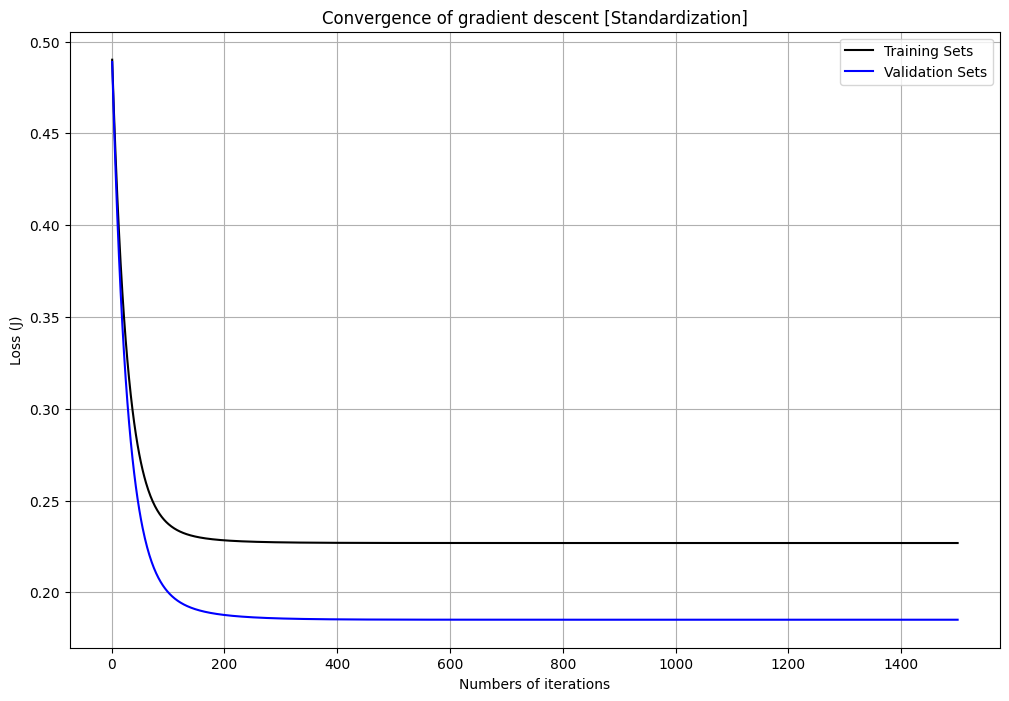

In [101]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.plot(range(1, iterations + 1), loss_history_test, color = 'blue')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.legend(['Training Sets', 'Validation Sets'])
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent [Standardization]")